In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
pi = np.pi
choices = [pi/4*(x+1)/100 for x in range(100)]

In [3]:
df = dd.read_csv('train_100.csv')

In [4]:
df = df.loc[:,['x','y','linescan']]

In [5]:
x = np.pi/8
rot = np.array([[np.cos(x), np.sin(x)],[-np.sin(x), np.cos(x)]])

In [6]:
df = df.compute()
org_df = df.copy()
min_max_org = df[df.linescan.gt(0)].loc[:, ['x', 'y']].apply([np.min, np.max]).to_numpy()

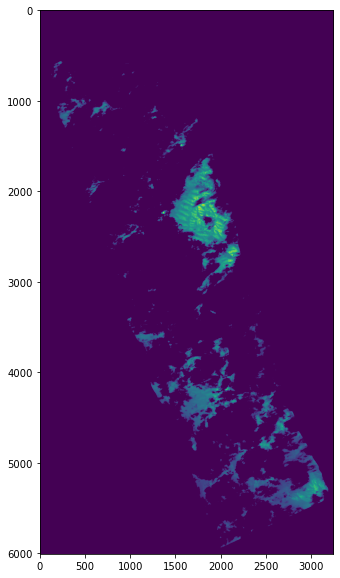

In [7]:
im = df.pivot_table(index = 'y', columns = 'x', values = 'linescan', fill_value = 0).to_numpy()
fig = plt.figure(figsize = (10,10))
plt.imshow(im)

In [8]:
df[['x','y']] = df[['x','y']].dot(rot).round(0).astype(int)
df[['x','y']] = (df[['x','y']]).round(-1)

In [9]:
df = df.groupby(['x','y']).agg(np.max).reset_index()

In [10]:
im = df.pivot_table(index = 'y', columns = 'x', values = 'linescan', fill_value = 0).to_numpy()

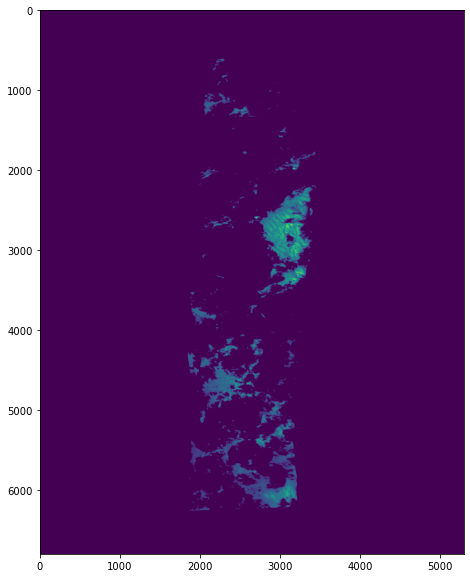

In [11]:
fig = plt.figure(figsize = (10,10))
plt.imshow(im)

In [14]:
min_max = df[df.linescan.gt(0)].loc[:, ['x', 'y']].apply([np.min, np.max]).to_numpy()

In [15]:
min_max

array([[-1802280,  5545240],
       [-1786270,  5601660]])

In [29]:
new_df = df.loc[df.x.ge(-1803000) & df.x.le(-1787000) & df.y.ge(5546000) & df.y.le(5601000), :]

In [30]:
new_im = new_df.pivot_table(index = 'y', columns = 'x', values = 'linescan', fill_value = 0)

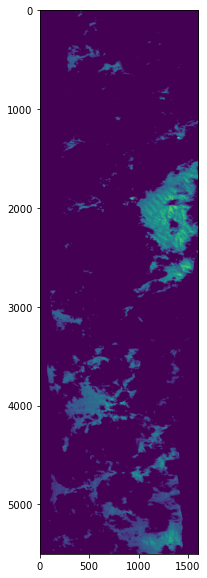

In [31]:
fig = plt.figure(figsize = (10,10))
plt.imshow(new_im)